In [26]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [27]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [28]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [29]:
!pip3 install citipy
import sys

In [30]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [31]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

621

In [32]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [33]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88394b95d8291bfdd5ab6b5a53be27b8
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88394b95d8291bfdd5ab6b5a53be27b8


In [34]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [35]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------
Beginning Data Retrieval     
-----------------------------


In [36]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(3)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | saint george
Processing Record 4 of Set 1 | new norfolk
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | saint george
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | hobart
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | malanje
Processing Record 6 of Set 1 | malanje
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | brae
Processing Record 9 of Set 1 | zacualpan
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | brae
Processing Record 9 of Set 1 | zacualpan
Processing Record 10 of Set 1 | namatanai
Processing Record 11 of Set 1 | faanui
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | tiksi
Processing Record 10 of Set 

Processing Record 43 of Set 2 | viedma
Processing Record 44 of Set 2 | praia da vitoria
Processing Record 45 of Set 2 | gushikawa
Processing Record 46 of Set 2 | bengkulu
Processing Record 47 of Set 2 | kununurra
Processing Record 48 of Set 2 | lasa
Processing Record 49 of Set 2 | almaznyy
Processing Record 50 of Set 2 | ongole
Processing Record 48 of Set 2 | lasa
Processing Record 49 of Set 2 | almaznyy
Processing Record 50 of Set 2 | ongole
Processing Record 1 of Set 3 | puerto madryn
Processing Record 1 of Set 3 | puerto madryn
Processing Record 2 of Set 3 | blackwater
Processing Record 2 of Set 3 | blackwater
Processing Record 3 of Set 3 | sao filipe
Processing Record 4 of Set 3 | mataura
Processing Record 5 of Set 3 | vila franca do campo
Processing Record 3 of Set 3 | sao filipe
Processing Record 4 of Set 3 | mataura
Processing Record 5 of Set 3 | vila franca do campo
Processing Record 6 of Set 3 | kracheh
Processing Record 6 of Set 3 | kracheh
City not found. Skipping...
Process

City not found. Skipping...
Processing Record 39 of Set 4 | beloha
Processing Record 40 of Set 4 | porto
Processing Record 41 of Set 4 | bonavista
Processing Record 40 of Set 4 | porto
Processing Record 41 of Set 4 | bonavista
Processing Record 42 of Set 4 | demba
Processing Record 42 of Set 4 | demba
Processing Record 43 of Set 4 | sabratah
Processing Record 43 of Set 4 | sabratah
Processing Record 44 of Set 4 | toliary
City not found. Skipping...
Processing Record 45 of Set 4 | erenhot
Processing Record 46 of Set 4 | husavik
Processing Record 44 of Set 4 | toliary
City not found. Skipping...
Processing Record 45 of Set 4 | erenhot
Processing Record 46 of Set 4 | husavik
Processing Record 47 of Set 4 | santa luzia
Processing Record 47 of Set 4 | santa luzia
Processing Record 48 of Set 4 | college
Processing Record 49 of Set 4 | pereira barreto
Processing Record 50 of Set 4 | aktash
Processing Record 48 of Set 4 | college
Processing Record 49 of Set 4 | pereira barreto
Processing Recor

Processing Record 32 of Set 6 | panaba
Processing Record 33 of Set 6 | tibiao
Processing Record 32 of Set 6 | panaba
Processing Record 33 of Set 6 | tibiao
Processing Record 34 of Set 6 | fort nelson
Processing Record 35 of Set 6 | zemio
Processing Record 34 of Set 6 | fort nelson
Processing Record 35 of Set 6 | zemio
Processing Record 36 of Set 6 | mokhsogollokh
Processing Record 36 of Set 6 | mokhsogollokh
Processing Record 37 of Set 6 | grindavik
Processing Record 38 of Set 6 | mar del plata
Processing Record 39 of Set 6 | santa maria do para
Processing Record 37 of Set 6 | grindavik
Processing Record 38 of Set 6 | mar del plata
Processing Record 39 of Set 6 | santa maria do para
Processing Record 40 of Set 6 | batagay-alyta
Processing Record 41 of Set 6 | fairbanks
Processing Record 42 of Set 6 | saldanha
Processing Record 43 of Set 6 | palabuhanratu
City not found. Skipping...
Processing Record 44 of Set 6 | taitung
Processing Record 40 of Set 6 | batagay-alyta
Processing Record 4

Processing Record 28 of Set 8 | brody
Processing Record 28 of Set 8 | brody
Processing Record 29 of Set 8 | souillac
Processing Record 30 of Set 8 | akdepe
Processing Record 29 of Set 8 | souillac
Processing Record 30 of Set 8 | akdepe
Processing Record 31 of Set 8 | bilibino
Processing Record 32 of Set 8 | ushtobe
Processing Record 31 of Set 8 | bilibino
Processing Record 32 of Set 8 | ushtobe
Processing Record 33 of Set 8 | jawhar
Processing Record 33 of Set 8 | jawhar
Processing Record 34 of Set 8 | marystown
Processing Record 34 of Set 8 | marystown
Processing Record 35 of Set 8 | beringovskiy
Processing Record 36 of Set 8 | betong
Processing Record 35 of Set 8 | beringovskiy
Processing Record 36 of Set 8 | betong
Processing Record 37 of Set 8 | opuwo
Processing Record 37 of Set 8 | opuwo
Processing Record 38 of Set 8 | itarema
Processing Record 38 of Set 8 | itarema
Processing Record 39 of Set 8 | sabang
Processing Record 39 of Set 8 | sabang
Processing Record 40 of Set 8 | attawa

Processing Record 22 of Set 10 | ortona
Processing Record 22 of Set 10 | ortona
Processing Record 23 of Set 10 | lodwar
Processing Record 23 of Set 10 | lodwar
Processing Record 24 of Set 10 | malwan
City not found. Skipping...
Processing Record 25 of Set 10 | jibuti
Processing Record 24 of Set 10 | malwan
City not found. Skipping...
Processing Record 25 of Set 10 | jibuti
Processing Record 26 of Set 10 | naliya
Processing Record 26 of Set 10 | naliya
Processing Record 27 of Set 10 | raga
Processing Record 27 of Set 10 | raga
Processing Record 28 of Set 10 | paris
Processing Record 29 of Set 10 | troitsko-pechorsk
Processing Record 28 of Set 10 | paris
Processing Record 29 of Set 10 | troitsko-pechorsk
Processing Record 30 of Set 10 | aksu
Processing Record 31 of Set 10 | bocana de paiwas
Processing Record 30 of Set 10 | aksu
Processing Record 31 of Set 10 | bocana de paiwas
Processing Record 32 of Set 10 | idrinskoye
Processing Record 32 of Set 10 | idrinskoye
Processing Record 33 of 

Processing Record 18 of Set 12 | yanam
Processing Record 19 of Set 12 | puerto ayacucho
Processing Record 19 of Set 12 | puerto ayacucho
Processing Record 20 of Set 12 | tateyama
Processing Record 21 of Set 12 | paducah
Processing Record 20 of Set 12 | tateyama
Processing Record 21 of Set 12 | paducah
Processing Record 22 of Set 12 | kuito
Processing Record 22 of Set 12 | kuito
Processing Record 23 of Set 12 | chachapoyas
Processing Record 23 of Set 12 | chachapoyas
Processing Record 24 of Set 12 | kropotkin
Processing Record 24 of Set 12 | kropotkin
Processing Record 25 of Set 12 | braganca
Processing Record 25 of Set 12 | braganca
Processing Record 26 of Set 12 | baykit
Processing Record 26 of Set 12 | baykit
Processing Record 27 of Set 12 | lichinga
Processing Record 27 of Set 12 | lichinga
Processing Record 28 of Set 12 | thilogne
City not found. Skipping...
Processing Record 29 of Set 12 | mishkino
Processing Record 28 of Set 12 | thilogne
City not found. Skipping...
Processing Re

In [37]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,57.60,77,20,10.36,PT,2022-01-28 00:37:04
1,Port Elizabeth,-33.9180,25.5701,67.10,88,0,5.75,ZA,2022-01-28 00:32:33
2,Saint George,37.1041,-113.5841,54.07,15,0,7.00,US,2022-01-28 00:35:45
3,New Norfolk,-42.7826,147.0587,86.67,33,27,6.53,AU,2022-01-28 00:31:25
4,Hobart,-42.8794,147.3294,87.03,55,75,9.22,AU,2022-01-28 00:31:06
5,Malanje,-9.5402,16.3410,62.67,98,100,3.62,AO,2022-01-28 00:38:25
6,Vaini,-21.2000,-175.2000,82.83,78,21,14.56,TO,2022-01-28 00:32:11
7,Brae,60.3964,-1.3530,42.71,73,48,11.56,GB,2022-01-28 00:35:19
8,Zacualpan,21.2500,-105.1667,85.62,83,100,1.88,MX,2022-01-28 00:38:26
9,Namatanai,-3.6667,152.4333,85.53,68,56,6.78,PG,2022-01-28 00:37:28


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,57.60,77,20,10.36,PT,2022-01-28 00:37:04
1,Port Elizabeth,-33.9180,25.5701,67.10,88,0,5.75,ZA,2022-01-28 00:32:33
2,Saint George,37.1041,-113.5841,54.07,15,0,7.00,US,2022-01-28 00:35:45
3,New Norfolk,-42.7826,147.0587,86.67,33,27,6.53,AU,2022-01-28 00:31:25
4,Hobart,-42.8794,147.3294,87.03,55,75,9.22,AU,2022-01-28 00:31:06
5,Malanje,-9.5402,16.3410,62.67,98,100,3.62,AO,2022-01-28 00:38:25
6,Vaini,-21.2000,-175.2000,82.83,78,21,14.56,TO,2022-01-28 00:32:11
7,Brae,60.3964,-1.3530,42.71,73,48,11.56,GB,2022-01-28 00:35:19
8,Zacualpan,21.2500,-105.1667,85.62,83,100,1.88,MX,2022-01-28 00:38:26
9,Namatanai,-3.6667,152.4333,85.53,68,56,6.78,PG,2022-01-28 00:37:28


In [38]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [39]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [40]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1643330467.4969978

1643330467.4969978

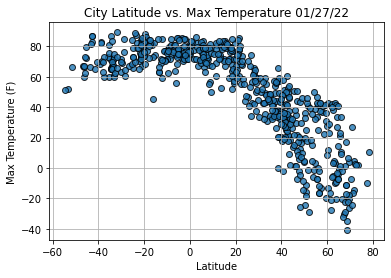

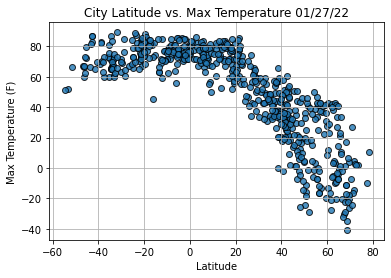

In [41]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

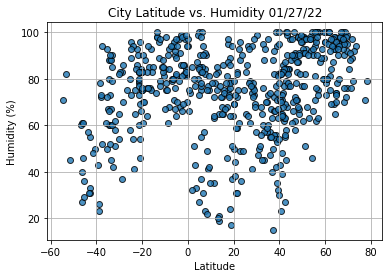

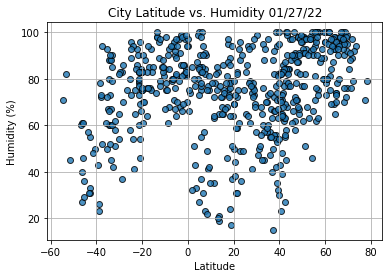

In [42]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

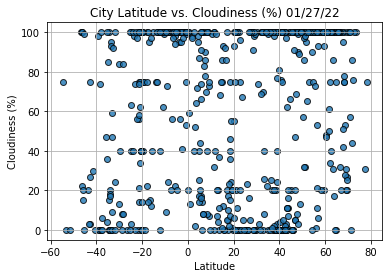

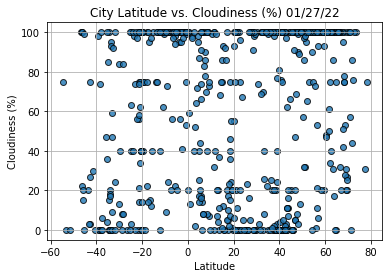

In [43]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

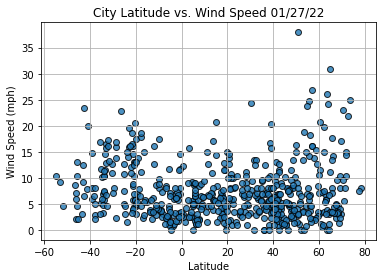

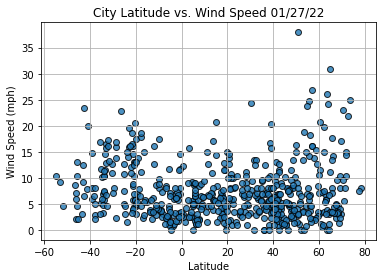

In [44]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [45]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [46]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [47]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011
y = -0.45x + 92.94
The p-value is: 0.011


In [48]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

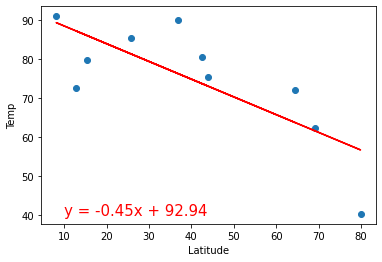

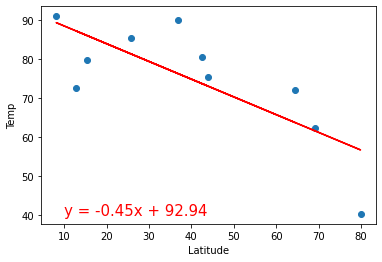

In [49]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [60]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [61]:
index13 = city_data_df.loc[13]
index13

City                          Bud
Lat                        39.447
Lng                      -86.1758
Max Temp                    32.25
Humidity                       82
Cloudiness                    100
Wind Speed                   5.93
Country                        US
Date          2022-01-28 00:38:26
Name: 13, dtype: object

City                          Bud
Lat                        39.447
Lng                      -86.1758
Max Temp                    32.25
Humidity                       82
Cloudiness                    100
Wind Speed                   5.93
Country                        US
Date          2022-01-28 00:38:26
Name: 13, dtype: object

In [62]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4      False
       ...  
570     True
571     True
572    False
573     True
574     True
Name: Lat, Length: 575, dtype: bool

0       True
1      False
2       True
3      False
4      False
       ...  
570     True
571     True
572    False
573     True
574     True
Name: Lat, Length: 575, dtype: bool

In [63]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,57.60,77,20,10.36,PT,2022-01-28 00:37:04
2,Saint George,37.1041,-113.5841,54.07,15,0,7.00,US,2022-01-28 00:35:45
7,Brae,60.3964,-1.3530,42.71,73,48,11.56,GB,2022-01-28 00:35:19
8,Zacualpan,21.2500,-105.1667,85.62,83,100,1.88,MX,2022-01-28 00:38:26
12,Tiksi,71.6872,128.8694,-14.24,97,44,10.27,RU,2022-01-28 00:31:31
...,...,...,...,...,...,...,...,...,...
569,Guiyang,26.5833,106.7167,34.29,93,100,8.95,CN,2022-01-28 00:41:06
570,Prince Rupert,54.3161,-130.3201,49.69,46,0,14.97,CA,2022-01-28 00:36:42
571,Cedartown,34.0537,-85.2550,45.23,70,100,3.56,US,2022-01-28 00:39:07
573,Wexford,52.3342,-6.4575,39.56,90,100,6.60,IE,2022-01-28 00:41:07


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,57.60,77,20,10.36,PT,2022-01-28 00:37:04
2,Saint George,37.1041,-113.5841,54.07,15,0,7.00,US,2022-01-28 00:35:45
7,Brae,60.3964,-1.3530,42.71,73,48,11.56,GB,2022-01-28 00:35:19
8,Zacualpan,21.2500,-105.1667,85.62,83,100,1.88,MX,2022-01-28 00:38:26
12,Tiksi,71.6872,128.8694,-14.24,97,44,10.27,RU,2022-01-28 00:31:31
...,...,...,...,...,...,...,...,...,...
569,Guiyang,26.5833,106.7167,34.29,93,100,8.95,CN,2022-01-28 00:41:06
570,Prince Rupert,54.3161,-130.3201,49.69,46,0,14.97,CA,2022-01-28 00:36:42
571,Cedartown,34.0537,-85.2550,45.23,70,100,3.56,US,2022-01-28 00:39:07
573,Wexford,52.3342,-6.4575,39.56,90,100,6.60,IE,2022-01-28 00:41:07


In [64]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,57.60,77,20,10.36,PT,2022-01-28 00:37:04
2,Saint George,37.1041,-113.5841,54.07,15,0,7.00,US,2022-01-28 00:35:45
7,Brae,60.3964,-1.3530,42.71,73,48,11.56,GB,2022-01-28 00:35:19
8,Zacualpan,21.2500,-105.1667,85.62,83,100,1.88,MX,2022-01-28 00:38:26
12,Tiksi,71.6872,128.8694,-14.24,97,44,10.27,RU,2022-01-28 00:31:31


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,57.60,77,20,10.36,PT,2022-01-28 00:37:04
2,Saint George,37.1041,-113.5841,54.07,15,0,7.00,US,2022-01-28 00:35:45
7,Brae,60.3964,-1.3530,42.71,73,48,11.56,GB,2022-01-28 00:35:19
8,Zacualpan,21.2500,-105.1667,85.62,83,100,1.88,MX,2022-01-28 00:38:26
12,Tiksi,71.6872,128.8694,-14.24,97,44,10.27,RU,2022-01-28 00:31:31


In [65]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

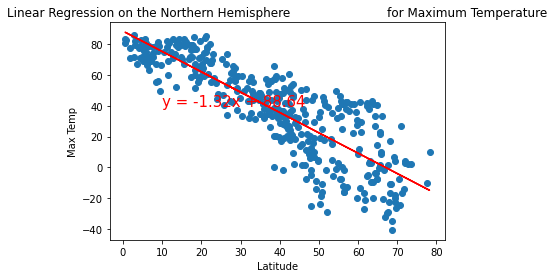

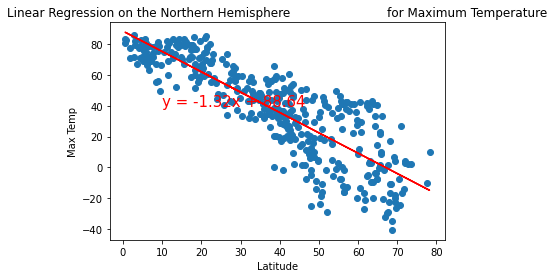

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

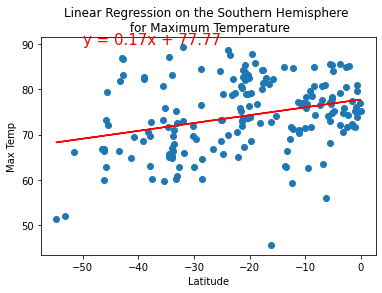

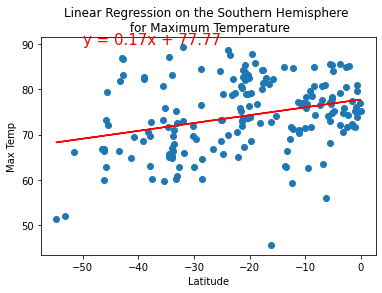

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

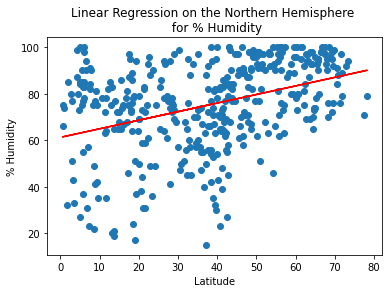

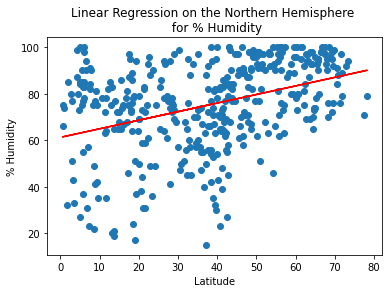

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

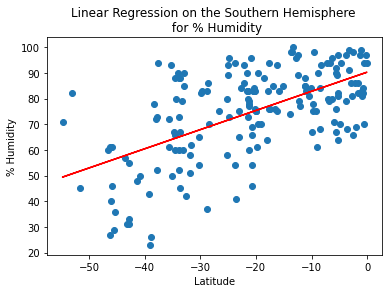

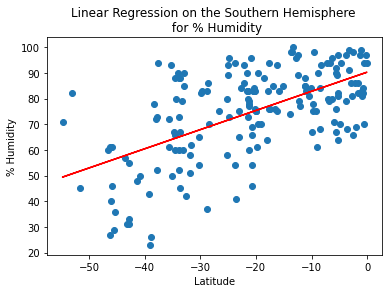

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

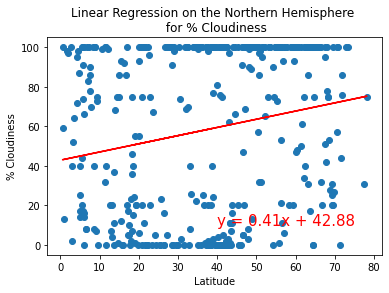

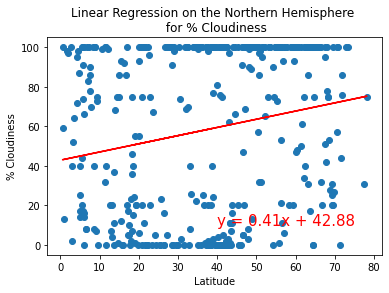

In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

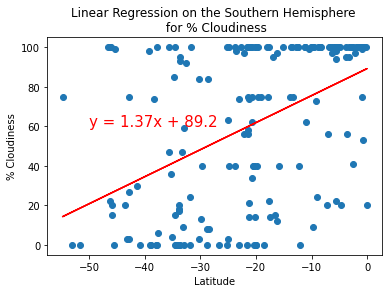

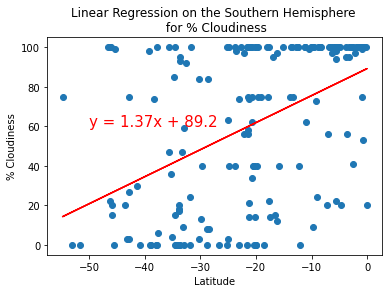

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

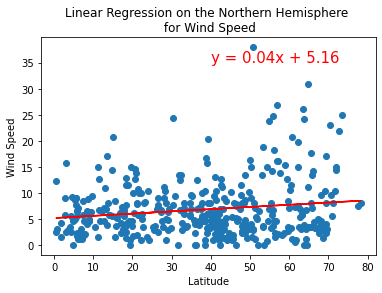

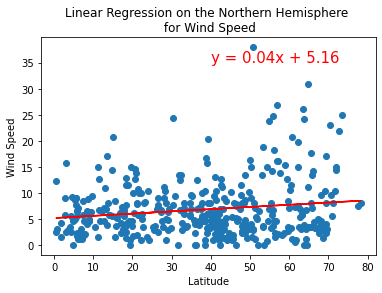

In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

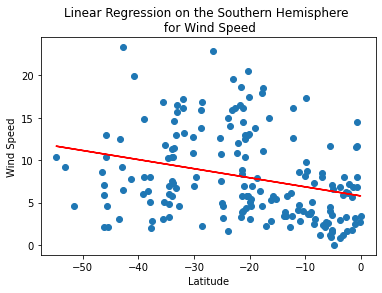

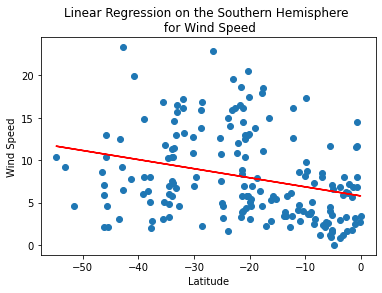

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))